In [1]:
# import some libraries.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the data
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
for i in digits:
  print(i)

data
target
frame
feature_names
target_names
images
DESCR


In [4]:
# look at the keys
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [5]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape) # the images is respahed (from 3d to 2d / or simply flatten to 2d)
print(digits.target.shape)


(1797, 8, 8)
(1797, 64)
(1797,)


In [6]:
import pandas as pd
df = pd.DataFrame({"target":digits.target})
df

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [7]:
# 0 -> black color
# 255 -> white color
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

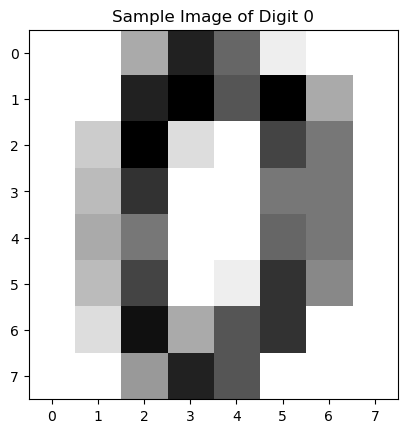

In [8]:
# Display digit 1010
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
sample_label = digits.target[0]
plt.title("Sample Image of Digit {}".format(sample_label))
plt.show()

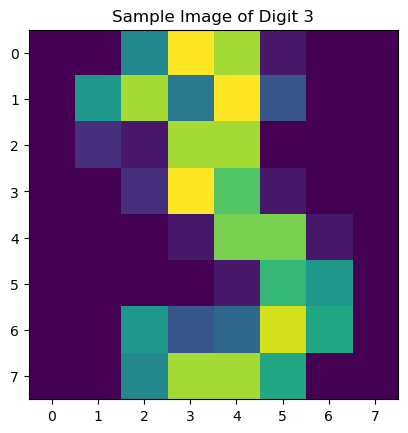

In [9]:
# Display digit 1010
plt.imshow(digits.images[3], interpolation='nearest')
sample_label = digits.target[3]
plt.title("Sample Image of Digit {}".format(sample_label))
plt.show()

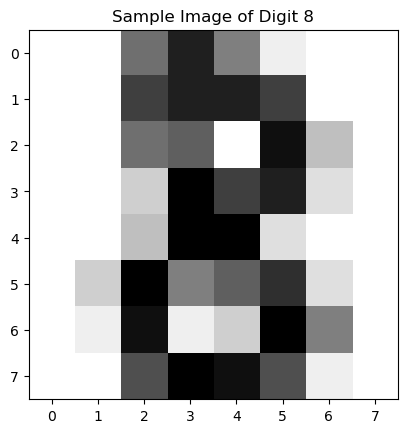

In [10]:
# Display digit 1010
plt.imshow(digits.images[8], cmap=plt.cm.gray_r, interpolation='nearest')
sample_label = digits.target[8]
plt.title("Sample Image of Digit {}".format(sample_label))
plt.show()

In [11]:
# Create feature and target arrays
X = digits.data
y = digits.target
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Let's split the data into testing and training sets.    

In [12]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state=666)


Fit the Knn classifier with 7 neighbors.  You can chose another number here.  

We'll go through some steps below to determine which number might work best for this data.  For now we will use 7 to see what happens.  

In [13]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)


In [14]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [15]:
# Print the train accuracy
print(knn.score(X_train, y_train))

0.9860821155184412


In [16]:
# Print the test accuracy
print(knn.score(X_test, y_test))

0.9861111111111112


**Finding a good k value**

Let's now compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you can develop an intuition for overfitting and underfitting a model.

Let's now streamline some of the steps we did above into a for loop.

In [17]:
# Loop over different values of k
train_accuracy = []
test_accuracy = []

for i in range(1,10):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_acc=knn.score(X_train, y_train)
    train_accuracy.append(train_acc)

    #Compute accuracy on the testing set
    test_acc=knn.score(X_test, y_test)
    test_accuracy.append(test_acc)


print(train_accuracy)
print(test_accuracy)

[1.0, 0.9909533750869868, 0.9930410577592206, 0.9909533750869868, 0.9895615866388309, 0.9860821155184412, 0.988865692414753, 0.9860821155184412, 0.9853862212943633]
[0.9916666666666667, 0.9888888888888889, 0.9888888888888889, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9805555555555555, 0.9833333333333333]


In [18]:
import numpy as np

arr = []
for i in range(len(train_accuracy)):
    diff = abs(train_accuracy[i] - test_accuracy[i])
    arr.append(diff)
    print("K value", i + 1, diff)

min_ = np.array(arr)
min_index = np.argmin(min_) + 1  # Adding 1 to get the K value corresponding to the minimum difference

print("\n")
print("The min value is", min_.min(), "at K value", min_index)


K value 1 0.008333333333333304
K value 2 0.002064486198097848
K value 3 0.004152168870331652
K value 4 0.004842263975875616
K value 5 0.0034504755277197097
K value 6 2.8995592670000292e-05
K value 7 0.002754581303641812
K value 8 0.0055265599628856465
K value 9 0.002052887961029981


The min value is 2.8995592670000292e-05 at K value 6


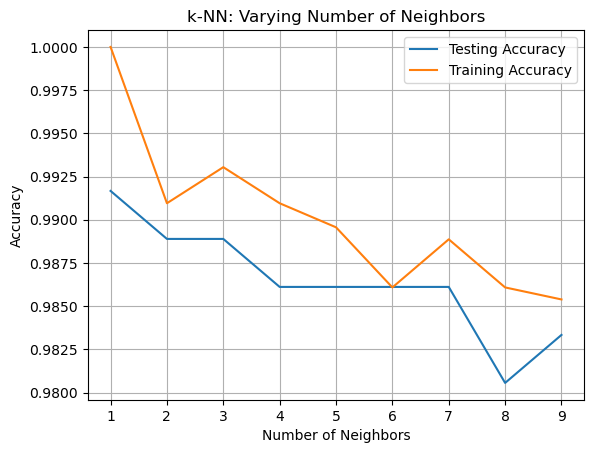

In [19]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
neighbors = [i for i in range(1,10)]
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


As we can see from the plot, it appears like the test accuracy is highest when using 3 and 5 neighbors.  7 isn't too bad, but using 8 neighbors or more seems to result in a simple model that under fits the data.

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
len(knn.predict(X_train))
print(classification_report(y_test, knn.predict(X_test)))

print(confusion_matrix(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       1.00      0.94      0.97        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  1  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0

In [21]:
knn.predict(X_test)

array([3, 1, 0, 5, 9, 6, 4, 7, 7, 0, 2, 5, 8, 8, 4, 3, 0, 2, 0, 0, 4, 7,
       6, 1, 8, 6, 1, 5, 7, 6, 7, 5, 0, 9, 3, 3, 4, 8, 7, 7, 5, 2, 4, 7,
       6, 4, 0, 0, 3, 0, 2, 3, 9, 6, 2, 2, 6, 9, 7, 4, 7, 0, 5, 6, 9, 5,
       5, 5, 8, 3, 8, 8, 4, 3, 9, 5, 8, 5, 4, 1, 1, 5, 1, 8, 7, 5, 5, 2,
       3, 0, 2, 8, 5, 5, 6, 8, 5, 1, 5, 1, 9, 2, 7, 2, 5, 6, 5, 7, 9, 4,
       7, 9, 7, 0, 5, 4, 5, 4, 3, 7, 2, 8, 0, 4, 0, 1, 0, 8, 3, 3, 9, 6,
       2, 0, 1, 1, 3, 2, 9, 7, 2, 2, 0, 9, 6, 7, 6, 5, 0, 6, 6, 1, 2, 1,
       2, 5, 4, 5, 8, 3, 5, 0, 0, 6, 7, 9, 3, 8, 6, 3, 0, 9, 8, 0, 2, 1,
       2, 5, 3, 9, 9, 4, 7, 6, 7, 2, 5, 4, 3, 0, 4, 0, 7, 7, 7, 7, 3, 2,
       6, 3, 3, 3, 1, 4, 4, 1, 6, 6, 6, 4, 1, 6, 3, 1, 1, 7, 4, 7, 7, 5,
       9, 8, 6, 2, 1, 4, 5, 9, 7, 6, 9, 3, 1, 8, 2, 1, 1, 1, 4, 8, 0, 1,
       3, 1, 2, 9, 6, 2, 9, 1, 4, 3, 4, 8, 8, 3, 4, 2, 0, 1, 0, 5, 3, 9,
       2, 8, 9, 8, 9, 1, 9, 2, 7, 9, 2, 0, 8, 1, 3, 1, 8, 3, 2, 3, 4, 1,
       2, 6, 1, 5, 9, 4, 5, 1, 4, 6, 0, 3, 3, 8, 9,

In [22]:
y_test

array([3, 1, 0, 5, 9, 6, 4, 7, 7, 0, 2, 5, 8, 8, 4, 3, 0, 2, 0, 0, 4, 7,
       6, 1, 8, 6, 1, 5, 7, 6, 7, 5, 0, 9, 3, 3, 4, 8, 7, 7, 5, 2, 4, 7,
       6, 4, 0, 0, 3, 0, 2, 3, 9, 6, 2, 2, 6, 9, 7, 4, 7, 0, 5, 6, 9, 5,
       9, 5, 8, 3, 8, 8, 4, 3, 9, 5, 8, 5, 4, 1, 1, 5, 1, 8, 7, 5, 5, 2,
       3, 0, 2, 8, 5, 5, 6, 8, 5, 1, 5, 1, 9, 2, 7, 2, 5, 6, 5, 7, 9, 4,
       7, 9, 7, 0, 5, 4, 5, 4, 3, 7, 2, 8, 0, 4, 0, 1, 0, 8, 3, 3, 9, 6,
       2, 0, 1, 1, 3, 2, 9, 7, 2, 2, 0, 9, 6, 7, 6, 5, 0, 6, 6, 8, 2, 1,
       2, 5, 4, 5, 8, 3, 5, 0, 0, 6, 7, 9, 3, 8, 6, 3, 0, 9, 8, 0, 2, 1,
       2, 5, 3, 9, 9, 4, 7, 6, 7, 2, 5, 4, 3, 0, 4, 0, 7, 7, 7, 7, 3, 2,
       6, 3, 3, 3, 1, 4, 4, 1, 6, 6, 6, 4, 1, 6, 3, 1, 1, 4, 4, 7, 7, 5,
       9, 8, 6, 2, 1, 4, 5, 9, 7, 6, 9, 3, 1, 8, 2, 1, 1, 8, 4, 8, 0, 1,
       3, 1, 2, 9, 6, 2, 9, 1, 4, 3, 4, 8, 8, 3, 4, 2, 0, 1, 0, 5, 9, 9,
       2, 8, 9, 8, 9, 1, 9, 2, 7, 9, 2, 0, 8, 1, 3, 1, 8, 3, 2, 3, 4, 1,
       2, 6, 1, 5, 9, 4, 5, 1, 4, 6, 0, 3, 3, 8, 9,

Text(50.722222222222214, 0.5, 'Predicted label')

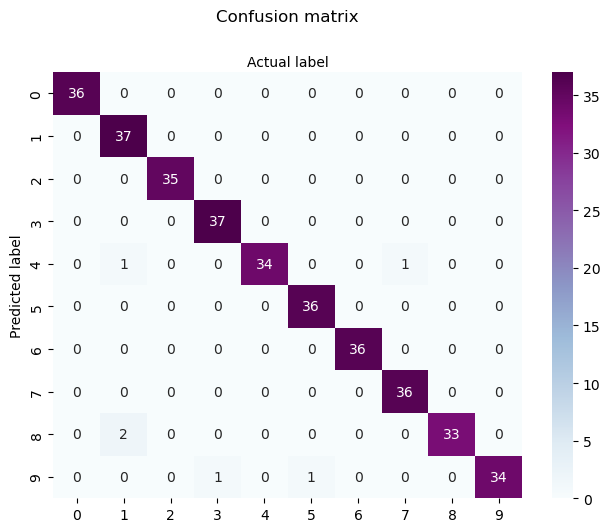

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_test,knn.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [24]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,36,0,0,0,0,0,0,0,0,0
1,0,37,0,0,0,0,0,0,0,0
2,0,0,35,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,0,1,0,0,34,0,0,1,0,0
5,0,0,0,0,0,36,0,0,0,0
6,0,0,0,0,0,0,36,0,0,0
7,0,0,0,0,0,0,0,36,0,0
8,0,2,0,0,0,0,0,0,33,0
9,0,0,0,1,0,1,0,0,0,34
